# 3회차 실습 과제: 추정과 가설검정

## 문제 항목

| 문제     | 주제                 | 핵심 개념                                       |
|----------|----------------------|-------------------------------------------------|
| 문제 1   | 신뢰구간 계산        | 점추정, 구간추정, 신뢰수준, 표본크기 결정        |
| 문제 2   | 단일표본 검정        | 가설 설정, t-검정, p-value 해석, 결론 도출       |
| 문제 3   | 두 그룹 비교         | 독립표본 t-검정, 효과크기, 단일 vs 독립 vs 대응 구분     |
| 문제 4   | 전후 비교   | 대응표본 t-검정, 검정력   |

---

## 핵심 공식 정리

### 신뢰구간

| 조건              | 공식                                                             |
|-------------------|------------------------------------------------------------------|
| σ를 아는 경우     | $\bar{X} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$       |
| σ를 모르는 경우   | $\bar{X} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$      |
| 필요 표본크기     | $n = \left(\frac{z_{\alpha/2} \cdot \sigma}{E}\right)^2$       |

### 검정통계량

| 검정               | 공식                                                                             |
|--------------------|----------------------------------------------------------------------------------|
| z-검정             | $z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}$                                |
| 단일표본 t-검정    | $t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}}, \quad df = n - 1$                   |
| 독립표본 t-검정    | $t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{s_1^2/n_1 + s_2^2/n_2}}$              |
| 대응표본 t-검정    | $t = \frac{\bar{d}}{s_d / \sqrt{n}}, \quad d_i = X_{after} - X_{before}$       |
| Cohen's d          | $d = \frac{|\bar{X}_1 - \bar{X}_2|}{s_{pooled}}$                               |

### scipy.stats 핵심 함수

| 함수                          | 설명                           | 사용 예시                                    |
|-------------------------------|--------------------------------|----------------------------------------------|
| `stats.t.interval()`         | t분포 기반 신뢰구간            | `stats.t.interval(0.95, df, loc, scale)`     |
| `stats.t.ppf()`              | t분포 임계값                   | `stats.t.ppf(0.975, df=29)`                 |
| `stats.ttest_1samp()`        | 단일표본 t-검정                | `stats.ttest_1samp(data, popmean=100)`       |
| `stats.ttest_ind()`          | 독립표본 t-검정                | `stats.ttest_ind(a, b, equal_var=False)`     |
| `stats.ttest_rel()`          | 대응표본 t-검정                | `stats.ttest_rel(after, before)`             |
| `stats.sem()`                | 표준오차 계산                  | `stats.sem(data)`                            |

### 판정 규칙

| p-value 결과  | 판정             | 해석                                          |
|---------------|------------------|-----------------------------------------------|
| p ≤ α         | H0 **기각**      | "이 결과가 우연이라고 보기 어렵습니다" → 유의   |
| p > α         | H0 **기각 실패** | "증거 부족, 판단 보류" (H0가 참은 아닙니다!)    |

---

In [2]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("=" * 60)
print("3회차 실습 과제: 추정과 가설검정")
print("=" * 60)

3회차 실습 과제: 추정과 가설검정


---

## 문제 1: 신뢰구간 계산

### 시나리오: 배달 앱 배달 시간 분석

배달 앱 운영팀이 평균 배달 시간을 파악하려 합니다.

40건의 배달 데이터를 수집했습니다.

**주어진 데이터:**

In [3]:
print("\n[문제 1] 배달 앱 배달 시간 분석")
print("=" * 50)

np.random.seed(42)
delivery_times = np.random.normal(loc=35, scale=8, size=40) # 평균 35분, 표준편차 8분인 데이터 40개 생성
delivery_times = np.round(delivery_times, 1)

print(f"배달 시간 데이터 (n = {len(delivery_times)}건):")
print(delivery_times)


[문제 1] 배달 앱 배달 시간 분석
배달 시간 데이터 (n = 40건):
[39.  33.9 40.2 47.2 33.1 33.1 47.6 41.1 31.2 39.3 31.3 31.3 36.9 19.7
 21.2 30.5 26.9 37.5 27.7 23.7 46.7 33.2 35.5 23.6 30.6 35.9 25.8 38.
 30.2 32.7 30.2 49.8 34.9 26.5 41.6 25.2 36.7 19.3 24.4 36.6]


### 문제 1-1: 점추정

**(a)** 모평균의 점추정값(표본평균)을 구하세요.

**(b)** 모표준편차의 점추정값(표본표준편차, ddof=1)을 구하세요.

**(c)** 표준오차(SE)를 구하세요.

In [4]:
print("\n[문제 1-1] 점추정")
print("-" * 40)

# TODO (a): 표본평균
x_bar = np.mean(delivery_times)

print(f"(a) 표본평균 = {x_bar:.2f}")

# TODO (b): 표본표준편차 (ddof=1)
s = np.var(delivery_times, ddof=1)

print(f"(b) 표본표준편차 = {s:.2f}")

# TODO (c): 표준오차 SE = s / sqrt(n)
se = np.std(delivery_times, ddof=1)

print(f"(c) 표준오차 SE = {se:.2f}")



[문제 1-1] 점추정
----------------------------------------
(a) 표본평균 = 33.25
(b) 표본표준편차 = 58.09
(c) 표준오차 SE = 7.62


### 문제 1-2: 신뢰구간 구하기

**(a)** 95% 신뢰구간을 **수동으로** 계산하세요.

**(b)** `stats.t.interval()`를 사용하여 95% 신뢰구간을 구하세요.

**(c)** 90%, 95%, 99% 신뢰구간을 모두 구하고, 구간 너비를 비교하세요.

> 신뢰수준이 높아지면 구간 너비는 어떻게 변하나요?

In [5]:
print("\n[문제 1-2] 신뢰구간 구하기")
print("-" * 40)

n = len(delivery_times)
alpha = 0.05
# x_bar = np.mean(delivery_times)
# s = np.var(delivery_times, ddof=1)
# se = np.std(delivery_times, ddof=1)

# TODO (a): 95% 신뢰구간 수동 계산 - t 분포 사용
t_crit = stats.t.ppf(1-alpha/2, df=n-1)  # t 임계값
margin = t_crit * se  # 오차한계 = t_crit * se
ci_low = x_bar - margin  # 하한
ci_high = x_bar + margin  # 상한

print(f"(a) 수동 계산:")
print(f"    t 임계값 (df={n-1}): {t_crit:.3f}")
print(f"    오차한계: ±{margin:.2f}")
print(f"    95% CI: [{ci_low:.2f}, {ci_high:.2f}]")


# TODO (b): scipy.stats 활용 95% 신뢰구간 계산
ci_scipy = stats.t.interval(0.95, df=n-1, loc=x_bar, scale=se)  # scipy 활용 신뢰 구간

print(f"\n(b) scipy 활용:")
print(f"    95% CI: {ci_scipy}")


# TODO (c): 세 가지 신뢰수준 너비 비교
print(f"\n(c) 신뢰수준별 비교:")
for confidence in [0.90, 0.95, 0.99]:
    ci = stats.t.interval(confidence, df=n-1, loc=x_bar, scale=se)
    width = ci[1] - ci[0]
    print(f"    {confidence*100:.0f}% CI: {ci}  (너비: {width:.1f})")

print("\n    해석: 신뢰수준이 높아질 수록 신뢰 구간 너비가 넓어진다.")



[문제 1-2] 신뢰구간 구하기
----------------------------------------
(a) 수동 계산:
    t 임계값 (df=39): 2.023
    오차한계: ±15.42
    95% CI: [17.83, 48.66]

(b) scipy 활용:
    95% CI: (np.float64(17.82927968756364), np.float64(48.66072031243637))

(c) 신뢰수준별 비교:
    90% CI: (np.float64(20.40390629636565), np.float64(46.08609370363435))  (너비: 25.7)
    95% CI: (np.float64(17.82927968756364), np.float64(48.66072031243637))  (너비: 30.8)
    99% CI: (np.float64(12.606932238906403), np.float64(53.883067761093606))  (너비: 41.3)

    해석: 신뢰수준이 높아질 수록 신뢰 구간 너비가 넓어진다.


### 문제 1-3: 표본크기 결정

경영진이 "평균 배달 시간의 **오차한계를 ±1분 이내**로 하고 싶다"고 합니다.

**(a)** 95% 신뢰수준에서 필요한 최소 표본크기를 구하세요.

**(b)** 오차한계를 ±0.5분으로 줄이면 표본크기가 어떻게 변하나요?

In [6]:
print("\n[문제 1-3] 표본크기 결정")
print("-" * 40)

z_95 = 1.96
sigma_est = np.std(delivery_times, ddof=1)  # 표본표준편차를 σ 추정치로 사용

# TODO (a): 오차한계 ±1분
E1 = 1.0
n_required_1 = (z_95 * sigma_est / E1) ** 2  # (z_95 * sigma_est / E1) ** 2 → 올림

print(f"(a) 오차한계 ±{E1}분 → 필요 표본크기: {int(np.ceil(n_required_1))}건")


# TODO (b): 오차한계 ±0.5분
E2 = 0.5
n_required_2 = (z_95 * sigma_est / E2) ** 2

print(f"(b) 오차한계 ±{E2}분 → 필요 표본크기: {int(np.ceil(n_required_2))}건")

print(f"\n    해석: 오차한계를 작게 할 수록 필요한 표본크기가 증가한다.")


[문제 1-3] 표본크기 결정
----------------------------------------
(a) 오차한계 ±1.0분 → 필요 표본크기: 224건
(b) 오차한계 ±0.5분 → 필요 표본크기: 893건

    해석: 오차한계를 작게 할 수록 필요한 표본크기가 증가한다.


---

## 문제 2: 단일표본 t-검정

### 시나리오: 음료 자판기 용량 검사

자판기 제조사는 커피 한 잔의 용량이 **200ml**이라고 주장합니다.

소비자 보호원이 무작위로 20잔을 측정하여 주장을 검증합니다.

**주어진 데이터:**

In [7]:
print("\n[문제 2] 자판기 용량 검사")
print("=" * 50)

np.random.seed(123)
coffee_ml = np.random.normal(loc=196, scale=6, size=20) # 평균이 196이고, 표준편차가 6인 데이터 20개 랜덤 생성
coffee_ml = np.round(coffee_ml, 1)

print(f"측정 데이터 (n = {len(coffee_ml)}잔):")
print(coffee_ml)
print(f"\n표본평균: {np.mean(coffee_ml):.2f}ml")
print(f"표본표준편차: {np.std(coffee_ml, ddof=1):.2f}ml")



[문제 2] 자판기 용량 검사
측정 데이터 (n = 20잔):
[189.5 202.  197.7 187.  192.5 205.9 181.4 193.4 203.6 190.8 191.9 195.4
 204.9 192.2 193.3 193.4 209.2 209.1 202.  198.3]

표본평균: 196.68ml
표본표준편차: 7.54ml


### 문제 2-1: 가설검정 5단계

유의수준 α = 0.05에서, 자판기 용량이 200ml에 미달하는지 검정하세요.

**(a)** 가설을 설정하세요.

**(b)** `stats.ttest_1samp()`으로 검정통계량과 p-value를 구하세요.

**(c)** 결론을 내리세요. (기각 또는 기각 실패, 그 의미)

**(d)** 95% 신뢰구간(양측)을 구하고, 구간에 200이 포함되는지 확인하세요. 그래서 검정 결과와 일관되는지 확인 하세요.

In [8]:
print("\n[문제 2-1] 가설검정 5단계")
print("-" * 40)

mu_0 = 200  # 제조사 주장
alpha = 0.05

# TODO (a): 가설 설정
print("[1단계] 가설 설정")
print(f"  H0: mu = {mu_0}  (주장대로 200ml)")
print(f"  H1: mu ≠ {mu_0} (규격에 맞지 않음)")   # 방향을 결정하세요
print(f"  검정 유형: 단일표본 t-검정")

print(f"\n[2단계] 유의수준: alpha = {alpha}")


# TODO (b): 검정 실행
t_stat = stats.ttest_1samp(coffee_ml, popmean=200)[0]
p_value_two = stats.ttest_1samp(coffee_ml, popmean=200)[1]  # stats.ttest_1samp 결과 (양측)
p_value = p_value_two  # 단측이라면 /2, 양측이라면 그대로

print(f"\n[3단계] 검정통계량")
print(f"  t-통계량: {t_stat}")

print(f"\n[4단계] p-value")
print(f"  p-value (양측): {p_value_two}")
print(f"  p-value (사용할 값): {p_value}")


# TODO (c): 결론
print(f"\n[5단계] 결론")

# TODO (d): [참고] 95% 신뢰구간
ci_95 = stats.t.interval(0.95, df=len(coffee_ml)-1, loc=np.mean(coffee_ml), scale=stats.sem(coffee_ml))

print(f"\n[참고] 95% 신뢰구간: {ci_95}")
print('95% 신뢰구간 안에 200이 포함된다.')
print('p-value가 0.05보다 커서 귀무가설을 기각하지 못했다. → 검정 결과와 일관됨')



[문제 2-1] 가설검정 5단계
----------------------------------------
[1단계] 가설 설정
  H0: mu = 200  (주장대로 200ml)
  H1: mu ≠ 200 (규격에 맞지 않음)
  검정 유형: 단일표본 t-검정

[2단계] 유의수준: alpha = 0.05

[3단계] 검정통계량
  t-통계량: -1.972277642519237

[4단계] p-value
  p-value (양측): 0.06331178777355802
  p-value (사용할 값): 0.06331178777355802

[5단계] 결론

[참고] 95% 신뢰구간: (np.float64(193.14643747367217), np.float64(200.20356252632786))
95% 신뢰구간 안에 200이 포함된다.
p-value가 0.05보다 커서 귀무가설을 기각하지 못했다. → 검정 결과와 일관됨


### 문제 2-2: p-value 해석 연습

다음 각 상황에서 올바른 해석을 고르세요.

**(a)** p-value = 0.03, α = 0.05 일 때 올바른 해석은?

1. "H0가 참일 확률이 3%이다"

2. "H0가 참일 때, 이 결과가 나올 확률이 3%이다"

3. "H1이 참일 확률이 97%이다"

**(b)** p-value = 0.12, α = 0.05 일 때, "H0가 참이다"라고 결론 내릴 수 있나요?

**(c)** 같은 데이터로 α = 0.01과 α = 0.10을 적용하면 결론이 달라질 수 있는 예를 설명하세요.

In [9]:
print("\n[문제 2-2] p-value 해석 연습")
print("-" * 40)

# TODO (a): 올바른 해석 번호
answer_a = 2  # 1, 2, 또는 3

print(f"(a) 올바른 해석: {answer_a}번")
print(f"    p-value는 가설 자체의 확률이 아니라, 가설이 맞을 경우 해당 상황이 얼마나 희귀한 상황인가를 수치화한 것이기 때문이다.")


# TODO (b)
print(f"\n(b) p=0.12일 때 'H0가 참이다'라고 할 수 있나요?")
print(f"    p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다. 그렇지만 참이라고 할 순 없다.\n    귀무가설을 기각할 충분한 증거가 없을 뿐이다.")


# TODO (c)
print(f"\n(c) 유의수준에 따른 결론 차이 예시:")
print(f"    문제 2-1에서 p-value가 약 0.06이었는데,\n    동일한 조건에서 α가 0.01 이라면 매우 엄격한 기준이기 때문에 귀무가설을 기각하지 못하고,\n    α가 0.10 이라면 기준이 완화되어 귀무가설을 기각할 수 있게 된다.")




[문제 2-2] p-value 해석 연습
----------------------------------------
(a) 올바른 해석: 2번
    p-value는 가설 자체의 확률이 아니라, 가설이 맞을 경우 해당 상황이 얼마나 희귀한 상황인가를 수치화한 것이기 때문이다.

(b) p=0.12일 때 'H0가 참이다'라고 할 수 있나요?
    p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다. 그렇지만 참이라고 할 순 없다.
    귀무가설을 기각할 충분한 증거가 없을 뿐이다.

(c) 유의수준에 따른 결론 차이 예시:
    문제 2-1에서 p-value가 약 0.06이었는데,
    동일한 조건에서 α가 0.01 이라면 매우 엄격한 기준이기 때문에 귀무가설을 기각하지 못하고,
    α가 0.10 이라면 기준이 완화되어 귀무가설을 기각할 수 있게 된다.


---

## 문제 3: 독립표본 t-검정

### 시나리오: 온라인 vs 오프라인 강의 효과 비교

교육 기관에서 온라인 강의와 오프라인 강의의 학습 효과를 비교합니다.

두 그룹은 서로 다른 학생들로 구성되어 있습니다 (독립표본).

**주어진 데이터:**

In [10]:
print("\n[문제 3] 온라인 vs 오프라인 강의 효과 비교")
print("=" * 50)

np.random.seed(42)
online = np.random.normal(loc=75, scale=12, size=35)   # 온라인 강의
offline = np.random.normal(loc=80, scale=10, size=30)   # 오프라인 강의

print(f"온라인 강의 (n={len(online)}): 평균={np.mean(online):.2f}, SD={np.std(online, ddof=1):.2f}")
print(f"오프라인 강의 (n={len(offline)}): 평균={np.mean(offline):.2f}, SD={np.std(offline, ddof=1):.2f}")


[문제 3] 온라인 vs 오프라인 강의 효과 비교
온라인 강의 (n=35): 평균=73.41, SD=11.18
오프라인 강의 (n=30): 평균=77.74, SD=8.72


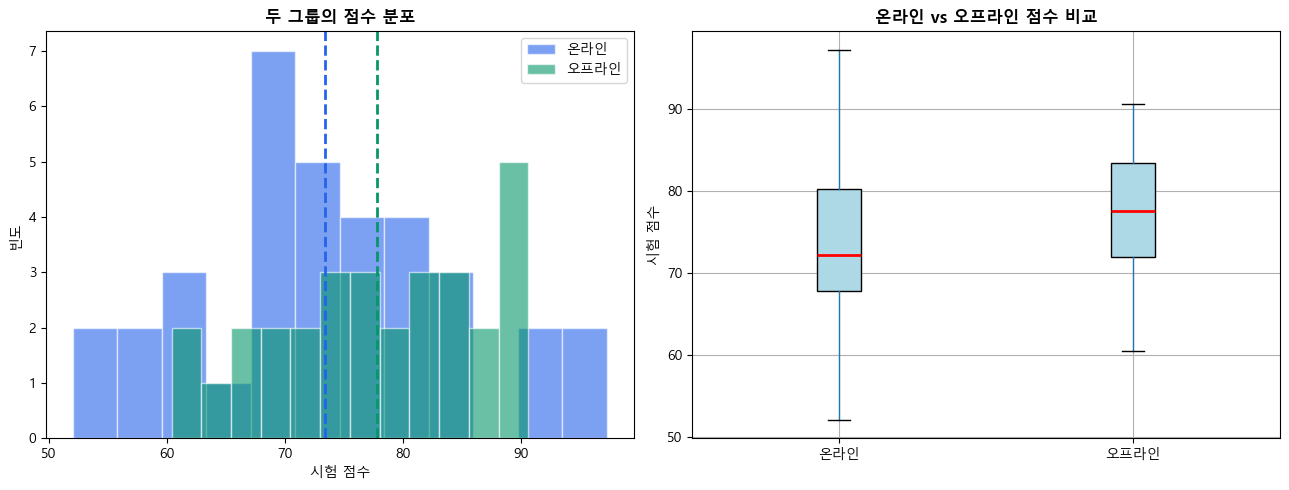

In [11]:
# 시각화: 두 그룹 비교
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# 히스토그램 비교
axes[0].hist(online, bins=12, alpha=0.6, color='#2563EB', edgecolor='white', label='온라인')
axes[0].hist(offline, bins=12, alpha=0.6, color='#059669', edgecolor='white', label='오프라인')
axes[0].axvline(np.mean(online), color='#2563EB', linestyle='--', linewidth=2)
axes[0].axvline(np.mean(offline), color='#059669', linestyle='--', linewidth=2)
axes[0].set_xlabel('시험 점수')
axes[0].set_ylabel('빈도')
axes[0].set_title('두 그룹의 점수 분포', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)

# 박스플롯
data_box = pd.DataFrame({
    '온라인': pd.Series(online),
    '오프라인': pd.Series(offline)
})
data_box.boxplot(ax=axes[1], patch_artist=True,
                 boxprops=dict(facecolor='lightblue'),
                 medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('시험 점수')
axes[1].set_title(f'온라인 vs 오프라인 점수 비교', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 문제 3-1: 독립표본 t-검정 수행

**(a)** 가설을 설정하세요.

> 두 강의 방식의 효과에 차이가 있는지 (양측검정)

**(b)** `stats.ttest_ind()`로 검정하세요.

> `equal_var=False`를 사용하여 Welch's t-test를 수행하세요 (등분산 가정 없이).

**(c)** α = 0.05에서 결론을 내리세요.

In [12]:
print("\n[문제 3-1] 독립표본 t-검정")
print("-" * 40)

alpha = 0.05

# TODO (a): 가설 설정
print(f"\nH0: μA = μB (두 강의 방식의 효과가 같다)")
print(f"H1: μA ≠ μB (두 강의 방식의 효과가 다르다)")

# TODO (b): Welch's t-test
t_stat, p_value = stats.ttest_ind(online, offline, equal_var=False) #equal_var: 두그룹의 분산이 같은지 유무

# TODO (c): 결론
# 유의수준 a = 0.05
print(p_value) # 0.08476831295678194
print(f'결과 : {p_value:.3f}로 귀무가설 기각 실패')


[문제 3-1] 독립표본 t-검정
----------------------------------------

H0: μA = μB (두 강의 방식의 효과가 같다)
H1: μA ≠ μB (두 강의 방식의 효과가 다르다)
0.08476831295678194
결과 : 0.085로 귀무가설 기각 실패


### 문제 3-2: 효과크기 (Cohen's d)

**(a)** Cohen's d를 계산하세요.

> 공식: $d = \frac{|\bar{X}_1 - \bar{X}_2|}{s_{pooled}}$
>
> $s_{pooled} = \sqrt{\frac{(n_1-1) s_1^2 + (n_2-1) s_2^2}{n_1 + n_2 - 2}}$

**(b)** 효과크기를 해석하세요. (작은/중간/큰 효과)

| d 값  | 해석      |
|-------|-----------|
| 0.2   | 작은 효과 |
| 0.5   | 중간 효과 |
| 0.8   | 큰 효과   |

**(c)** p-value 결과와 효과크기를 종합하여 최종 판단을 내리세요.

In [13]:
print("\n[문제 3-2] 효과크기 (Cohen's d)")
print("-" * 40)

n1, n2 = len(online), len(offline)
s1 = np.std(online, ddof=1)
s2 = np.std(offline, ddof=1)
mu1 = np.mean(online)
mu2 = np.mean(offline)
s_pooled = np.sqrt(((n1-1)*(s1**2) + (n2-1)*(s2**2)) / (n1+n2-2))

# TODO (a): Cohen's d 계산
d = abs(mu1 - mu2) / s_pooled
print(d.round(3))

# TODO (b): 해석
def interpret_d(d):
    """Cohen's d 해석"""
    if d < 0.2:
        return "무시할 수준"
    elif d < 0.5:
        return "작은 효과"
    elif d < 0.8:
        return "중간 효과"
    else:
        return "큰 효과"

print(interpret_d(d))


# TODO (c): 종합 판단
# print(p_value) 0.08476831295678194
print(f"종합 판단 : p_value가 {p_value:.3f}, Cohen's d가 {d:.3f}로 {interpret_d(d)}이다.\n효과 크기가 중간 정도(0.5에 근접)이지만, 샘플 크기가 충분하지 않아 통계적 유의성을 확보하지 못했다.")


[문제 3-2] 효과크기 (Cohen's d)
----------------------------------------
0.428
작은 효과
종합 판단 : p_value가 0.085, Cohen's d가 0.428로 작은 효과이다.
효과 크기가 중간 정도(0.5에 근접)이지만, 샘플 크기가 충분하지 않아 통계적 유의성을 확보하지 못했다.


### 문제 3-3: 적절한 t검정 선택

아래 각 상황에서 어느 검정을 사용해야 하는지 고르고, 그 이유를 간단히 적어보세요.

**보기**: 단일표본 t-검정 / 독립표본 t-검정(Student's) / 독립표본 t-검정(Welch's) / 대응표본 t-검정

**(a)** 제과업체에서 과자 1봉지의 규격 중량은 150g입니다. 생산라인에서 12봉지를 샘플링하여 규격에 맞는지 확인하려 합니다.

**(b)** A반(30명)과 B반(28명) 학생들의 수학 점수 차이를 비교 (두 반의 분산이 비슷함)

**(c)** A공장(25개)과 B공장(30개) 배터리 수명을 비교하려 하는데, 두 공장의 분산이 같은지 모릅니다.

**(d)** 같은 환자 20명에게 치료 전후 혈압을 측정하여 치료 효과를 검증

**(e)** 만약 (d)의 데이터를 독립표본 t-검정으로 잘못 분석하면 어떤 문제가 생기나요?

In [14]:
print("\n[문제 3-3] 적절한 t검정 선택")
print("-" * 40)
print("보기: 단일표본 t-검정 / 독립표본 t-검정(Student's) /")
print("      독립표본 t-검정(Welch's) / 대응표본 t-검정")

# TODO (a)
print("\n(a) 제과업체에서 과자 1봉지의 규격 중량은 150g입니다.")
print("    생산라인에서 12봉지를 샘플링하여 규격에 맞는지 확인하려 합니다.")
print(f"    사용할 검정: 단일표본 t-검정")
print(f"    이유: 단일 집단의 표본 평균을 특정 값과 비교하는 것이기 때문에")

# TODO (b)
print("\n(b) A반(30명)과 B반(28명) 학생들의 수학 점수 차이를 비교")
print("    (두 반의 분산이 비슷함)")
print(f"    사용할 검정: 독립표본 t-검정(Student's)")
print(f"    이유: 두 그룹의 분산이 비슷하다고 가정하고, 등분산 검정 진행")

# TODO (c)
print("\n(c) A공장(25개)과 B공장(30개) 배터리 수명을 비교하려 하는데,")
print("    두 공장의 분산이 같은지 모릅니다.")
print(f"    사용할 검정: 독립표본 t-검정(Welch's)")
print(f"    이유: 두 그룹의 분산이 같지 않은 경우를 고려하기 위해")

# TODO (d)
print("\n(d) 같은 환자 20명에게 치료 전후 혈압을 측정하여 치료 효과를 검증")
print(f"    사용할 검정: 대응표본 t-검정")
print(f"    이유: 동일 대상에 대해 전후 상황만 달라졌기 때문에")

# TODO (e)
print("\n(e) 만약 (d)의 데이터를 독립표본 t-검정으로 잘못 분석하면")
print("    어떤 문제가 생기나요?")
print(f"    문제점: 동일 대상 기준으로, 전후 데이터에 존재할 수 있는 개인차를 고려하지 못해서 오류가 커질 수 있음")


[문제 3-3] 적절한 t검정 선택
----------------------------------------
보기: 단일표본 t-검정 / 독립표본 t-검정(Student's) /
      독립표본 t-검정(Welch's) / 대응표본 t-검정

(a) 제과업체에서 과자 1봉지의 규격 중량은 150g입니다.
    생산라인에서 12봉지를 샘플링하여 규격에 맞는지 확인하려 합니다.
    사용할 검정: 단일표본 t-검정
    이유: 단일 집단의 표본 평균을 특정 값과 비교하는 것이기 때문에

(b) A반(30명)과 B반(28명) 학생들의 수학 점수 차이를 비교
    (두 반의 분산이 비슷함)
    사용할 검정: 독립표본 t-검정(Student's)
    이유: 두 그룹의 분산이 비슷하다고 가정하고, 등분산 검정 진행

(c) A공장(25개)과 B공장(30개) 배터리 수명을 비교하려 하는데,
    두 공장의 분산이 같은지 모릅니다.
    사용할 검정: 독립표본 t-검정(Welch's)
    이유: 두 그룹의 분산이 같지 않은 경우를 고려하기 위해

(d) 같은 환자 20명에게 치료 전후 혈압을 측정하여 치료 효과를 검증
    사용할 검정: 대응표본 t-검정
    이유: 동일 대상에 대해 전후 상황만 달라졌기 때문에

(e) 만약 (d)의 데이터를 독립표본 t-검정으로 잘못 분석하면
    어떤 문제가 생기나요?
    문제점: 동일 대상 기준으로, 전후 데이터에 존재할 수 있는 개인차를 고려하지 못해서 오류가 커질 수 있음


---

## 문제 4: 대응표본 t-검정과 검정력

### 시나리오: 영어 학습 앱 효과 검증

교육 회사가 새로운 영어 학습 앱의 효과를 검증합니다.

15명의 학생이 앱 사용 전후에 영어 시험을 치렀습니다.

**주어진 데이터:**

In [15]:
print("\n[문제 4] 영어 학습 앱 효과 검증")
print("=" * 50)

np.random.seed(42)
n_students = 15

before_scores = np.random.normal(loc=65, scale=10, size=n_students)
improvement = np.random.normal(loc=5, scale=6, size=n_students)
after_scores = before_scores + improvement

before_scores = np.round(before_scores, 1)
after_scores = np.round(after_scores, 1)

print(f"{'학생':>4} {'사전':>8} {'사후':>8} {'변화':>8}")
print("-" * 32)
for i in range(n_students):
    diff = after_scores[i] - before_scores[i]
    print(f"  {i+1:>2d}   {before_scores[i]:>6.1f}   {after_scores[i]:>6.1f}   {diff:>+6.1f}")

print(f"\n사전 평균: {np.mean(before_scores):.2f}")
print(f"사후 평균: {np.mean(after_scores):.2f}")
print(f"차이 평균: {np.mean(after_scores - before_scores):.2f}")



[문제 4] 영어 학습 앱 효과 검증
  학생       사전       사후       변화
--------------------------------
   1     70.0     71.6     +1.6
   2     63.6     62.5     -1.1
   3     71.5     78.4     +6.9
   4     80.2     79.8     -0.4
   5     62.7     59.2     -3.5
   6     62.7     76.5    +13.8
   7     80.8     84.4     +3.6
   8     72.7     78.1     +5.4
   9     60.3     56.8     -3.5
  10     70.4     72.2     +1.8
  11     60.4     66.0     +5.6
  12     60.3     58.4     -1.9
  13     67.4     74.7     +7.3
  14     45.9     47.3     +1.4
  15     47.8     51.0     +3.2

사전 평균: 65.11
사후 평균: 67.79
차이 평균: 2.68


### 문제 4-1: 대응표본 t-검정

**(a)** 가설을 설정하세요.

**(b)** 검정을 수행하세요.

**(c)** α = 0.05에서 결론을 내리세요.

**(d)** 차이(d = 사후 - 사전)의 95% 신뢰구간을 구하세요.

In [25]:
print("\n[문제 4-1] 대응표본 t-검정")
print("-" * 40)

alpha = 0.05
differences = after_scores - before_scores

# TODO (a): 가설 설정
print("귀무가설: μ = 0 (효과 없음)")
print("대립가설: μ > 0 (효과 있음, 점수가 증가함) → 우측검정")

# TODO (b): 대응표본 t-검정
t_stat, p_value = stats.ttest_rel(after_scores, before_scores)

# 우측 단측 검정 ->  점수가 증가한 경우 t 값이 양수가 나옴

print(t_stat, p_value) # 2.2253850059629188 0.04300142886411689

p_value  = p_value / 2  # 양측 검정의 p값을 2로 나눠서 단측 검정의 p값으로 한다

# TODO (c): 결론
if  t_stat > 0  and p_value <= alpha :
    print(f'P_{p_value} H0 귀무가설 기각 : 영어 학습 앱이 효과가 있다고 말 할 수 있다.')
else :
    print(f'P_{p_value} H0 귀무가설 지지 : 영어 학습 앱이 효과가 없다고 말 할 수 있다.')

# TODO (d): 차이의 95% 신뢰구간
ci_95 = stats.t.interval(0.95, df=len(differences)-1, loc=np.mean(differences), scale=stats.sem(differences))
print(f"\n차이의 95% 신뢰구간: {ci_95}")
print('95% 신뢰구간이 0을 포함하지 않으므로 p_value 값으로 검정한 결과와 일관된다.')



[문제 4-1] 대응표본 t-검정
----------------------------------------
귀무가설: μ = 0 (효과 없음)
대립가설: μ > 0 (효과 있음, 점수가 증가함) → 우측검정
2.2253850059629188 0.04300142886411689
P_0.021500714432058445 H0 귀무가설 기각 : 영어 학습 앱이 효과가 있다고 말 할 수 있다.

차이의 95% 신뢰구간: (np.float64(0.09706342578121419), np.float64(5.262936574218784))
95% 신뢰구간이 0을 포함하지 않으므로 p_value 값으로 검정한 결과와 일관된다.


### 문제 4-2 (도전!) : 검정력 분석 

앱의 실제 효과가 **평균 5점 향상**이라고 가정합니다.

현재 표본(n=15)으로 이 효과를 탐지할 수 있는 확률(검정력)은 얼마인가요?

> 힌트: `TTestPower.solve_power()`를 사용하세요. effect_size에는 Cohen's d = mu_d / s_d 를 넣어야 합니다.

**(a)** 현재 표본크기(n=15)에서의 검정력을 계산하세요.

**(b)** 80% 검정력을 달성하려면 최소 몇 명이 필요한가요? 

**(c)** 검정력 곡선을 그리세요. (x축: 표본크기 n, y축: 검정력 Power)
> 힌트: n을 5~100 범위로 변화시키며 각각의 검정력을 계산하고, 80% 기준선도 함께 표시하세요.


In [32]:
print("\n[문제 4-2] 검정력 분석")
print("-" * 40)

# 가정
mu_d = 5           # 가정한 평균 차이 (점)
s_d = np.std(differences, ddof=1)  # 차이의 표준편차

print(f"가정: 실제 효과 = {mu_d}점 향상")
print(f"차이의 표준편차 sd = {s_d:.2f}")


# TODO (a): 현재 검정력 (n=15)

from statsmodels.stats.power import TTestPower

analysis = TTestPower()

# Cohen's d 계산 (|mu_d| / s_d)
cohens_d = abs(mu_d) / s_d # 효과 크기

# TTestPower.solve_power() 사용
power_lib = analysis.solve_power(  # 공식문서 참고
        effect_size=cohens_d, #효과 크기
        nobs = 15, # 표본 크기
        alpha = alpha, # 유의 수준
        alternative = 'larger' # 단측검정
    )

print(f'검정력: {power_lib:.2f}')

# TODO (b): 80% 검정력에 필요한 표본 크기
n_req = analysis.solve_power(  # 공식문서 참고
        effect_size=cohens_d, #효과 크기
        alpha = alpha, # 유의 수준
        power = 0.8,
        alternative = 'larger' # 단측검정
    )

print(f'80% 검정력에 필요한 표본 크기: {np.ceil(n_req)}')


[문제 4-2] 검정력 분석
----------------------------------------
가정: 실제 효과 = 5점 향상
차이의 표준편차 sd = 4.66
검정력: 0.99
80% 검정력에 필요한 표본 크기: 7.0


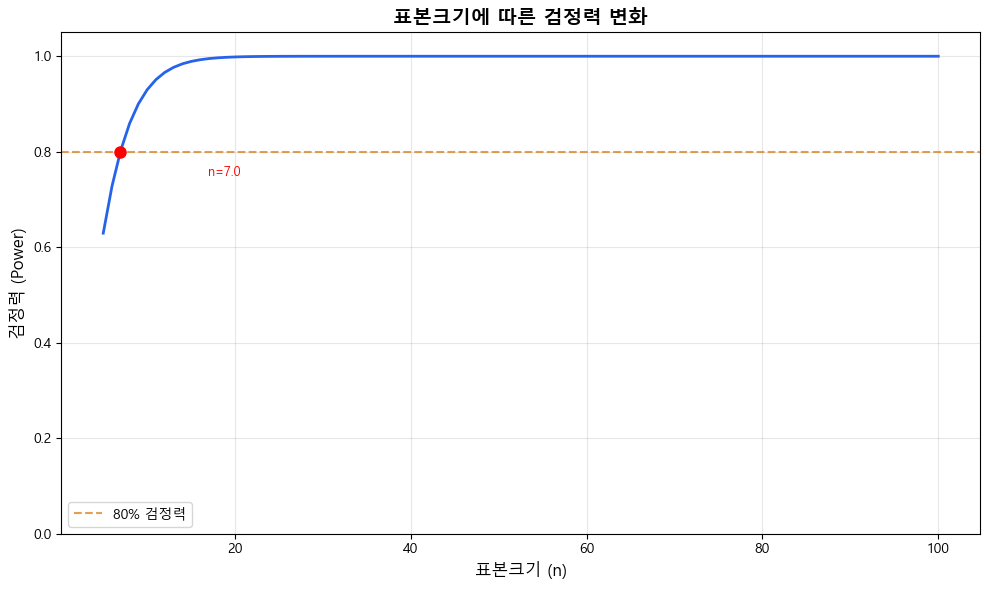

In [40]:
# TODO (c): 검정력 곡선 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# TODO: n_range에 대해 검정력을 계산하고 plot 하세요
n_range = np.arange(5, 101)
powers = []
mu_0 = 0
mu_1 = 5
target_power = 0.80

for n in n_range:
    p = analysis.solve_power(  # 공식문서 참고
            effect_size=cohens_d, #효과 크기
            nobs = n, # 표본 크기
            alpha = alpha, # 유의 수준
            alternative = 'larger' # 단측검정
        )
    powers.append(p)

ax.plot(n_range, powers, color='#2563EB', linewidth=2)
ax.axhline(0.80, color='#D97706', linestyle='--', alpha=0.7, label='80% 검정력')


ax.plot(n_req, 0.80, 'o', markersize=8, color='red')
ax.annotate(f'n={np.ceil(n_req)}', xy=(n_req, 0.80), xytext=(n_req +10, 0.80-0.05), fontsize=9, color='red')

ax.set_xlabel('표본크기 (n)', fontsize=12)
ax.set_ylabel('검정력 (Power)', fontsize=12)
ax.set_title('표본크기에 따른 검정력 변화', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()